## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\matth\world_uni_rankings'

In [4]:
df = pd.read_csv(os.path.join(path, '01 Data', 'timedata_new.csv'), index_col = False)

In [5]:
df.shape

(2603, 8)

In [6]:
df.head()

,world_rank,university_name,country,teaching,income,total_score,num_students,year
0,1,Harvard University,United States of America,99.7,34.5,96.1,20152,2011
1,2,California Institute of Technology,United States of America,97.7,83.7,96.0,2243,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,87.5,95.6,11074,2011
3,4,Stanford University,United States of America,98.3,64.3,94.3,15596,2011
4,5,Princeton University,United States of America,90.9,48.9,94.2,7929,2011


In [16]:
df.timesnum = df.drop(columns = ['university_name', 'country']) ## removing string values from dataset

In [17]:
df.timesnum.head() ## leaving only numerical values in the dataset

,world_rank,teaching,income,total_score,num_students,year
0,1,99.7,34.5,96.1,20152,2011
1,2,97.7,83.7,96.0,2243,2011
2,3,97.8,87.5,95.6,11074,2011
3,4,98.3,64.3,94.3,15596,2011
4,5,90.9,48.9,94.2,7929,2011


## 2. The Elbow Technique

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [24]:
score = [kmeans[i].fit(df.timesnum).score(df.timesnum) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\matth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\clust

[-794625967456.8401,
 -431584757925.3992,
 -259151388207.44385,
 -163616181569.9145,
 -102401723988.55946,
 -72217140406.24808,
 -53620319038.57575,
 -39739931860.2938,
 -27052061908.371235]

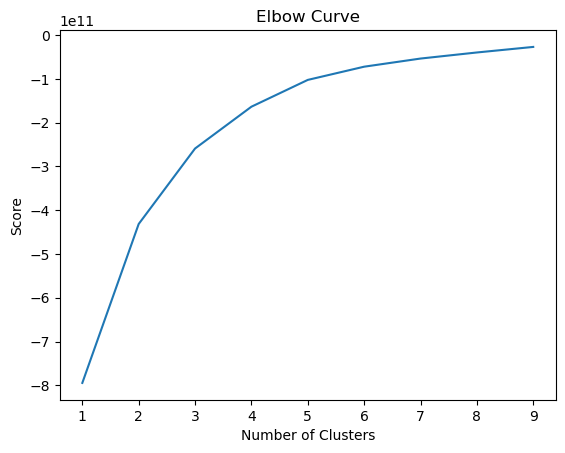

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In the above imagine, there is a steady curve between 2-6 - but will take the mean which is 4 to asthe optimal count

## 3. K-Means Clustering

In [29]:
kmeans = KMeans(n_clusters = 4) 

In [30]:
kmeans.fit(df.timesnum)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [32]:
df.timesnum['clusters'] = kmeans.fit_predict(df.timesnum)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
df.timesnum.head()

,world_rank,teaching,income,total_score,num_students,year,clusters
0,1,99.7,34.5,96.1,20152,2011,0
1,2,97.7,83.7,96.0,2243,2011,2
2,3,97.8,87.5,95.6,11074,2011,2
3,4,98.3,64.3,94.3,15596,2011,2
4,5,90.9,48.9,94.2,7929,2011,2


In [34]:
df.timesnum['clusters'].value_counts()

0    1155
2    1145
3     289
1      14
Name: clusters, dtype: int64

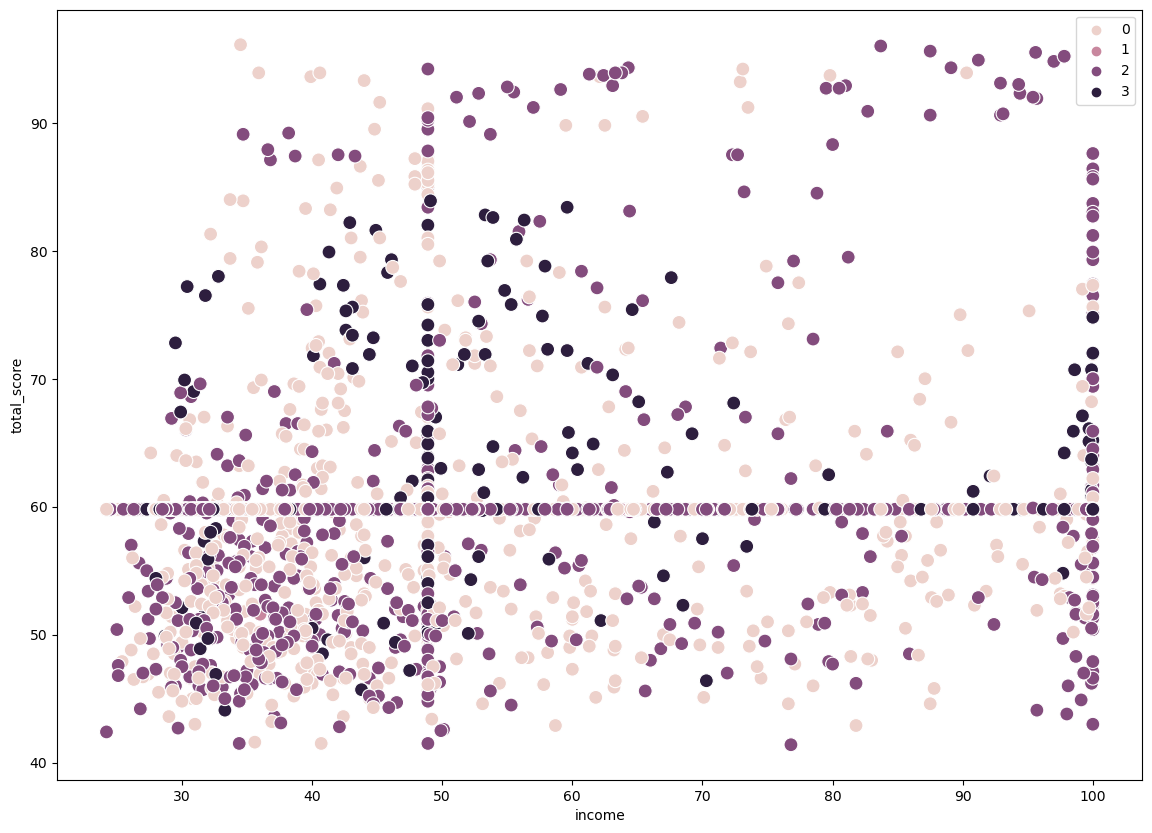

In [36]:
# Plotting the clusters for the "University income" and "Total Score" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=df['income'], y=df['total_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('income') # Label x-axis.
plt.ylabel('total_score') # Label y-axis.
plt.show()

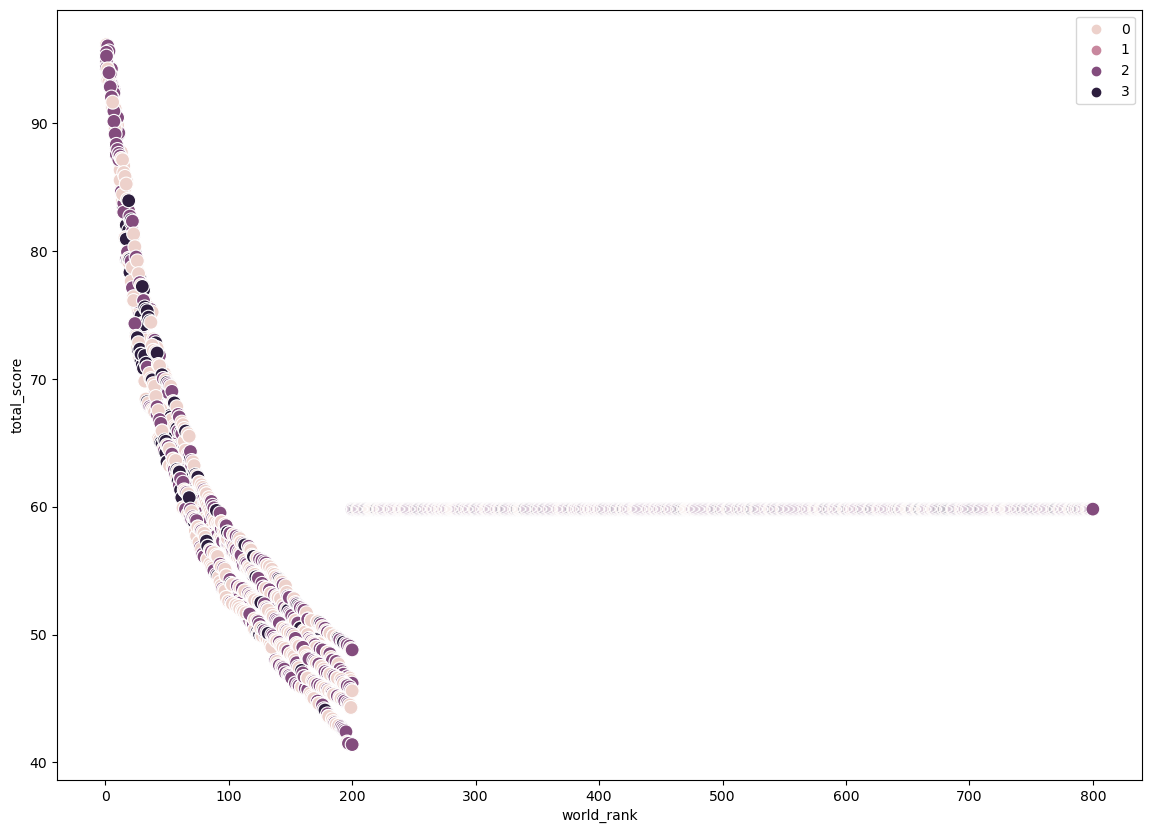

In [37]:
# Plotting the clusters for the "University ranking" and "Total Score" variables.

plt.figure(figsize=(14,10))
ax = sns.scatterplot(x=df['world_rank'], y=df['total_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('world_rank') # Label x-axis.
plt.ylabel('total_score') # Label y-axis.
plt.show()

In [ ]:
#### The above cluster makes sense, as it shows the higher the total score of university the higher they are ranked. 
#### This is evidence that the higher a university scores correlates with how well they are ranked with the Times Ranking Table

In [38]:
df.timesnum.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.timesnum.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.timesnum.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.timesnum.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [40]:
df.timesnum.groupby('cluster').agg({'income':['mean', 'median'], 
                         'total_score':['mean', 'median'], 
                         'num_students':['mean', 'median'],
                          'teaching':['mean', 'median']})

income        total_score          num_students            \
                  mean median        mean median           mean    median   
cluster                                                                     
black        48.909541  43.50   62.178092   59.8   51430.674912   48007.0   
dark purple  49.270862  42.30   59.735776   59.8   12149.117241   12091.0   
pink         48.797644  42.80   59.333246   59.8   27327.108202   26467.0   
purple       39.964286  34.35   59.214286   59.8  155616.142857  127431.0   

              teaching         
                  mean median  
cluster                        
black        42.966078  39.30  
dark purple  35.286379  30.50  
pink         39.214049  36.35  
purple       26.171429  28.25